## Getting started with `cartopy`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

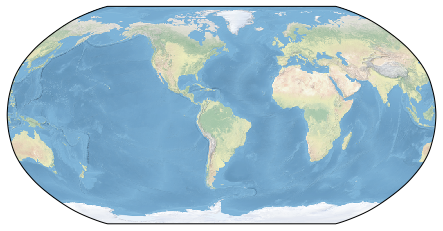

In [2]:
import cartopy
import cartopy.crs as ccrs

# use matplotlib's built-in transform support, same function calls
fig = plt.figure(figsize=(10, 4))
axm = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=300.))

# set the extent to global
axm.set_global()

# add standard background map
axm.stock_img()

## Plotting a global contour map 

Load a dataset of dissolved oxygen concentration in the thermocline (400-600 m depth).

In [3]:
import xarray as xr
ds = xr.open_dataset('data/woa2013v2-O2-thermocline-ann.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
Data variables:
    O2       (lat, lon) float32 ...
    dz       float32 ...
Attributes:
    title:       World Ocean Atlas 2013 version 2
    references:   Garcia H. E., T. P. Boyer, R. A. Locarnini, A. V. Mishonov,...

### Use `xarray`'s hooks to `matplotlib` to create a quick-look plot

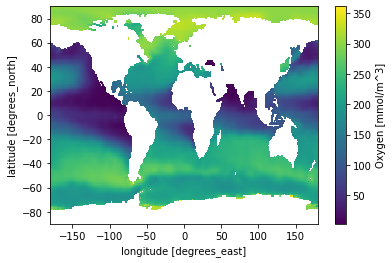

In [4]:
ds.O2.plot();

### Colormap normalization

- Objects that use colormaps by default linearly map the colors in the colormap from data values vmin to vmax.
- [Colormap normalization](https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html) provides a means of manipulating the mapping. 

For instance:

In [5]:
import matplotlib.colors as colors
norm = colors.Normalize(vmin=-1, vmax=1.)
norm(0.)

0.5

We can map data to colormaps in a non-linear fashion using other normalizations, for example:

In [6]:
norm = colors.LogNorm(vmin=1e-2, vmax=1e2)
np.array(norm([0.01, 0.1, 1., 10., 100.]))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### ...back to oxygen
Set contour levels to non-uniform intervals and make the colormap centered at the hypoxic threshold using `DivergingNorm`.

In [7]:
levels = [0, 10, 20,  30, 40, 50, 60, 80, 100, 125, 150, 175, 200, 225, 
          250, 275, 300]

norm = colors.DivergingNorm(vmin=levels[0], vmax=levels[-1], vcenter=60.)

Add a cyclic point to accomodate the periodic domain.

In [8]:
from cartopy.util import add_cyclic_point
field, lon = add_cyclic_point(ds.O2, coord=ds.lon)
lat = ds.lat

### Putting it all together...

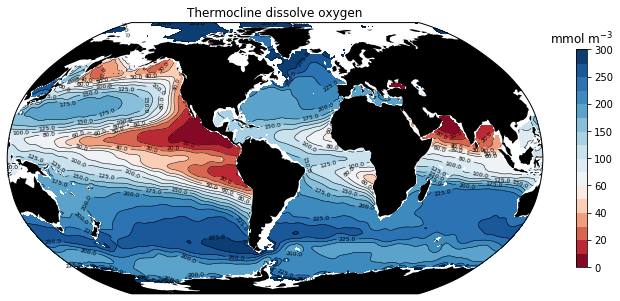

In [9]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=305.0))

# filled contours
cf = ax.contourf(lon, lat, field, levels=levels, norm=norm, cmap='RdBu',
                 transform=ccrs.PlateCarree());

# contour lines
cs = ax.contour(lon, lat, field, colors='k', levels=levels, linewidths=0.5,
                transform=ccrs.PlateCarree())

# add contour labels
lb = plt.clabel(cs, fontsize=6, inline=True, fmt='%r');

# land
land = ax.add_feature(
    cartopy.feature.NaturalEarthFeature('physical','land','110m', facecolor='black'))

# colorbar and labels
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('mmol m$^{-3}$')
ax.set_title('Thermocline dissolve oxygen');